\section{Overlapping clusterings}

In \ref{amigo}, the BCUBED measure is extended to \emph{overlapping clusterings}, by \todo{leg in 1-2 zinnen uit hoe ze dat aanpassen}.
This metric has the undesirable property that a hypothesized clustering which s not equal to the true clustering ca still receive the perfect score of $1$. This is repaired in \ref{die 2 mexicanen} by \todo{leg ook weer even uit}.

\todo{probeer ook nu uitte leggen waarom deze "oplossing" toch wat mal is vanuit een confusion table gedachte}

Here we show how the overlap weighted P and R measures can naturally be applied to a setting with overlapping clusterings.

\subsection{Overlapping clusters, when can they occur?}

There are two situations in which overlapping clusterings occur naturally. 
The first is also mentioned as a motivation in \ref{Amigo} and resembles a multi-label classification problem, familiar from the Reuters dataset or the categories in Wikipedia.
In this situation objects have several \emph{aspects} and we like to cluster them for each aspect seperately. For each aspect, clusters do nót overlap. 

The second situation is best described as clusters with fuzzy borders. An example of a fuzzy border in text-segmentation is a "bridge-sentence" between two topical sections which could be added to both segments.
The k-clique percolation method for graph clustering \cite{palla nature} is one of the few clustering algorithms which allows overlapping clusters. From them we borrow the concept of the \emph{core} of a cluster. Cores never overlap. 

We will now show that both types can simply be captured using small adaptations of the overlap weighted precision and recall notions.

\subsection{Multi aspect clustering}

Given a set of objects $E$ and a natural number $d$, a \emph{$d$-aspect clustering $T^d$ of $E$} is a sequence $\langle T_1,T_2,\ldots,T_d\rangle$ of partial clusterings.
The task of $d$-aspect clustering of $E$ is to find $d$ many partial clusterings $\langle H_1,\ldots,H_d\rangle$.
Note that the number of aspects is given. But the prediction just yields $d$ partial clusterings \emph{without mapping these to the $d$ true clusterings}.
The metric which determines the quality of the preicted multi-aspect clustering equals the highest possible score obtained when the hypothesized aspects are matched optimally to the true aspects. It is computed as follows:
\begin{enumerate}
\item for each $1\leq i,j\leq d$, compute $PQ(h_i,t_j)$; \todo{probably update witha macro}
\item find the alingnment $f:d\longrightarrow  d$ which maximizes the mean $PQ$. That mean $PQ$ is then the value of the metric.
\end{enumerate}
Note  in the first step we must compute $d^2$ many $PQ$ values, and in the second we need to find the maximum within $d$ factorial mappings. As $d$ is normally relatively small, this is in practice no problem (for 10 aspects this took 8 seconds on a MacBook Pro). 
Here we choose to optimize the mean PQ over all aspects, but other criteria, like the mean PQ of the top $k$ scoring aspects are possible as well. 

\todo{Experiment met Reuters of zo, of nog mooier een text-segmentatie dataset die we op meerdere manieren segmenteren: bijvoorbeeld paginas versus topics, maar dat is ietwat mal}

\subsection{Fuzzy border clustering}

With fuzzy border clustering, both $T$ and $H$ are subsets of the powerset of $E$, without the non-overlap constraint. For $t_i\in T$ define the \emph{core} of $t_i$, denoted by $\hat{t_i}$, as $t_i\setminus \bigcup_{j\neq i} t_j$, and similarly for $h_i\in H$. Clearly cores do not overlap. We then define the pverlap weighted  F1 score as follows:

\begin{enumerate}
\item compute the set of TPs using the cores;
\item compute the unweighted $F1$ \todo{thus RQ} using this set of $TP$s;
\item compute the weight $SQ$ as the mean $IoU$ of these $TP$s but then computed over teh original segments, that is
%
\[ SQ(TP) = \frac{\Sigma_{(\hat{h},\hat{t})\in TP} IoU(h,t)}{\vert TP\vert}. \]
\item The final score then is the unweighted $F1$ multiplied by the weight $SQ(TP)$, as before.
\end{enumerate}

\todo{Wat analyses hierover, bijvoorbeeld dat cheaten niet werkt, dus als je je predicties heel ruim gaat nemen, dan heb je haast geen TPs, en score je slecht.}
\todo{Je zou een true clustering kunnen nemen, en een hypothesized en die hypothesized clusters met $k$ procent vergroten, en dan eens kijken wat er gebruert met de scores, en een ander expriment waarbij de true ook fuzz is, en dan $k$ laten toenemen.}


# clusteren met meerdere aspecten

We doen een soort "multi-class labelene" maar dan met clusteren.
Het aantal aspecten ligt vast en is gegeven, $D$. 

Taak is dan om $D$ clusteringen te produceren. Die wordne vergeleken met $D$ true clusteringen.

Als volgt:

* $H_D$ is nu een sequence van $H$ clusteringen/segmentaties (partieel of niet)
* bereken voor elke $h_i\in H_D$, $t_j\in T_D$, de $PQ(h_i,t_j)$. Zet die in een $D\times D$ matrix, en zoek nu uitputtend (dat zijn $D!$ veel mogelijkheden, $D=11$ is dat 40 miljoen), de aspect-aspect matching die de hoogste mean PQ oplevert. Dat is dan de behaalde score.

Dus de behaalde score is de maximaal haalbare score, als de matching zo goed mogelijk gedaan wordt.


## complexiteit

* Lijkt erg hoog, maar in de praktijk valt de zoektocht heel erg mee (bij 10 dimensies 8 seconden op mijn mac)

In [1]:
import numpy as np
from itertools import permutations 
import pandas as pd
import seaborn as sns
 

In [2]:
dims=10
D=np.random.random((dims,dims))

list(permutations(range(3)))

def argmax(dims,D):
    grootste=0
    argmax= range(dims)
    
    all_possibilities= permutations(range(dims))
    for p in all_possibilities:
        tmp= sum(D[i,j] for (i,j) in enumerate(p))
        #print(tmp,p)
        if tmp> grootste:
            grootste=tmp
            argmax=p
    return grootste/dims,argmax



In [3]:
%%time
dims=10
D=np.random.random((dims,dims))
argmax(dims,D)

CPU times: user 6.99 s, sys: 42.2 ms, total: 7.03 s
Wall time: 7.03 s


(0.8820384915660423, (5, 0, 3, 7, 4, 1, 8, 9, 6, 2))

In [4]:
np.math.factorial(11)

39916800

In [5]:
def argmax_dist(dims,D):
    grootste=0
    argmax= range(dims)
    L=[]
    all_possibilities= permutations(range(dims))
    for p in all_possibilities:
        tmp= sum(D[i,j] for (i,j) in enumerate(p))
        L.append(tmp/dims)
        #print(tmp,p)
        if tmp> grootste:
            grootste=tmp
            argmax=p
    return L,argmax

CPU times: user 444 ms, sys: 1.1 s, total: 1.54 s
Wall time: 271 ms


count    40320.000000
mean         0.456645
std          0.102700
min          0.111124
25%          0.385727
50%          0.454806
75%          0.525945
max          0.875595
dtype: float64

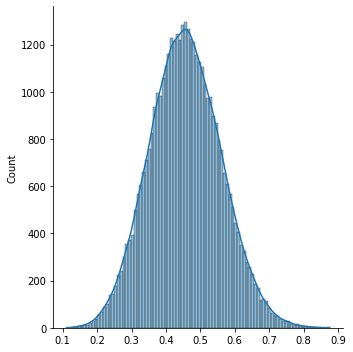

In [6]:
%%time
dims=8
D=np.random.random((dims,dims))
L,a=argmax_dist(dims,D)

sns.displot(L, kde=True);
LL=pd.Series(L)
LL.describe()

# clusteren met fuzzy borders

* bereken de partiele isomorfism/matching met de **cores** van alle (overlappende) blokken
* Gegeven $H$, de core van elke $h_i\in H$ is $h_i\setminus \bigcup_{j\neq i} h_j$, en net zo voor $T$.
* De RQ berekenen we dan op de cores (want daarmee bepalen we de TPs)
* Maar de SQ op de hele oppervlakte van de TPs, dus inclusief de overlappende borders.

### Werkt dat?

* Als je heel grote blokken (met dus veel overlap) gaat maken, krijg je maar weinig TPs, en dus een lage RQ
* 